In [1]:
#import libraries
import pandas as pd
import numpy as np


In [2]:
#credit-history.csv
df= pd.read_csv('credit_history.csv')
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


Target customers who are likely to default

### Summary Statistics

In [3]:
#Sanity check
#null values
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [4]:
#shape
df.shape

(7727, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    7727 non-null   int64  
 1   amount     7727 non-null   int64  
 2   grade      7727 non-null   object 
 3   years      7448 non-null   float64
 4   ownership  7727 non-null   object 
 5   income     7727 non-null   float64
 6   age        7727 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 422.7+ KB


In [6]:
#describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
default,7727.0,0.478452,0.499568,0.0,0.0,0.0,1.0,1.0
amount,7727.0,9453.345412,6298.595800,500.0,5000.0,8000.0,12000.0,35000.0
years,7448.0,6.086332,6.700758,0.0,2.0,4.0,8.0,62.0
income,7727.0,63371.969622,46871.950549,4000.0,37000.0,54000.0,76796.5,1200000.0
age,7727.0,27.542125,6.132121,20.0,23.0,26.0,30.0,94.0


In [32]:
# target variable
df['default'].value_counts()

# 0 - non default
# 1 - default

0    4030
1    3697
Name: default, dtype: int64

### Data Preprocessing

In [8]:
#missing values -years 

In [9]:
df['years'].fillna(df['years'].median(),inplace=True)

In [10]:
df1 = df.copy()
df1= pd.get_dummies(df1,drop_first=True) #one hot encoding
df1.head()

,default,amount,years,income,age,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_OTHER,ownership_OWN,ownership_RENT
0,0,1000,2.0,19200.0,24,1,0,0,0,0,0,0,0,1
1,1,6500,2.0,66000.0,28,0,0,0,0,0,0,0,0,0
2,0,2400,2.0,60000.0,36,0,0,0,0,0,0,0,0,1
3,0,10000,3.0,62000.0,24,0,1,0,0,0,0,0,0,1
4,1,4000,2.0,20000.0,28,0,1,0,0,0,0,0,0,1


In [11]:
df1.drop_duplicates(inplace=True)

In [12]:
df1.shape

(7332, 14)

In [13]:
# categorical encoding

In [14]:
# divide into X and y 
# input features
 #target variable

In [15]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#cnames = ["amount", "years", "income", "age"]
#sc = MinMaxScaler()
#for col in cnames:
#    X[col] = sc.fit_transform(X[col].values.reshape(-1,1))

In [16]:
X = df1.drop('default',axis=1) # input features
y = df1['default'] #target variable

In [17]:
X.head()

,amount,years,income,age,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,1,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,0,0,0,0,0,0,0,0,0
2,2400,2.0,60000.0,36,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,1,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,1,0,0,0,0,0,0,1


In [18]:
# Explore with various preprocessing techniques

# Model Building

In [19]:
#Train-Test split
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
# 20% test data - xtest , ytest - actual target variable
# 80 % train data - xtrain,ytrain
# xtrain -  i/p features for train data
# ytrain - target variable for train data
# xtest -i/p features for test data 
# ytest is actual target variable for test data

In [21]:
xtrain.head()

,amount,years,income,age,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_OTHER,ownership_OWN,ownership_RENT
255,3200,1.0,57000.0,22,0,0,0,0,0,0,0,0,0
1933,10000,5.0,54996.0,24,0,1,0,0,0,0,0,0,1
6076,4000,20.0,35000.0,25,0,1,0,0,0,0,0,1,0
2915,11000,2.0,30720.0,25,0,1,0,0,0,0,0,0,1
7488,12000,4.0,33600.0,22,0,1,0,0,0,0,0,1,0


In [22]:
# xtrain shape
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(5865, 13)
xtest shape(1467, 13)
ytrain shape(5865,)
ytest shape(1467,)


In [23]:
ytrain.value_counts(normalize=True)

1    0.502472
0    0.497528
Name: default, dtype: float64

In [24]:
ytest.value_counts(normalize=True)

1    0.502386
0    0.497614
Name: default, dtype: float64

### Base Model

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
adc = AdaBoostClassifier(n_estimators=100)

In [28]:
adc.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100)

In [29]:
ypred = adc.predict(xtest)

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,plot_confusion_matrix

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


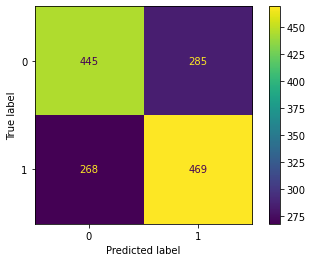

In [34]:
plot_confusion_matrix(adc,xtest,ytest)

In [36]:
445+285 # Number of negatives(0s)

730

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       730
           1       0.62      0.64      0.63       737

    accuracy                           0.62      1467
   macro avg       0.62      0.62      0.62      1467
weighted avg       0.62      0.62      0.62      1467



In [38]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [39]:
clf = GridSearchCV(adc,{'n_estimators':[i for i in range(50,200,10)]})
clf.fit(xtrain,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150, 160, 170, 180, 190]})

In [ ]:
#end of notebook